In [ ]:
! pip install momepy
! pip install contextily

In [39]:
import geopandas
import matplotlib.pyplot as plt
import momepy
import networkx as nx
from contextily import add_basemap

In [40]:
url = 'https://drive.google.com/uc?id=1ky7gzbW9VlzNU5f44nWRJ9SZ9FWz3UmW'
gdf = geopandas.read_file(url)
gdf = gdf.drop('fid', axis=1)
gdf = gdf.explode(index_parts=True)
gdf.head()

,,geometry
0,0,"LINESTRING (509695.255 7769668.258, 509662.461..."
1,0,"LINESTRING (510504.635 7769396.410, 510415.198..."
2,0,"LINESTRING (509963.885 7769579.654, 509875.669..."
3,0,"LINESTRING (509785.781 7769639.236, 509767.958..."
4,0,"LINESTRING (509875.669 7769609.539, 509785.781..."


In [41]:
G = momepy.gdf_to_nx(gdf, approach="primal", length='length')

positions = {n: [n[0], n[1]] for n in list(G.nodes)}

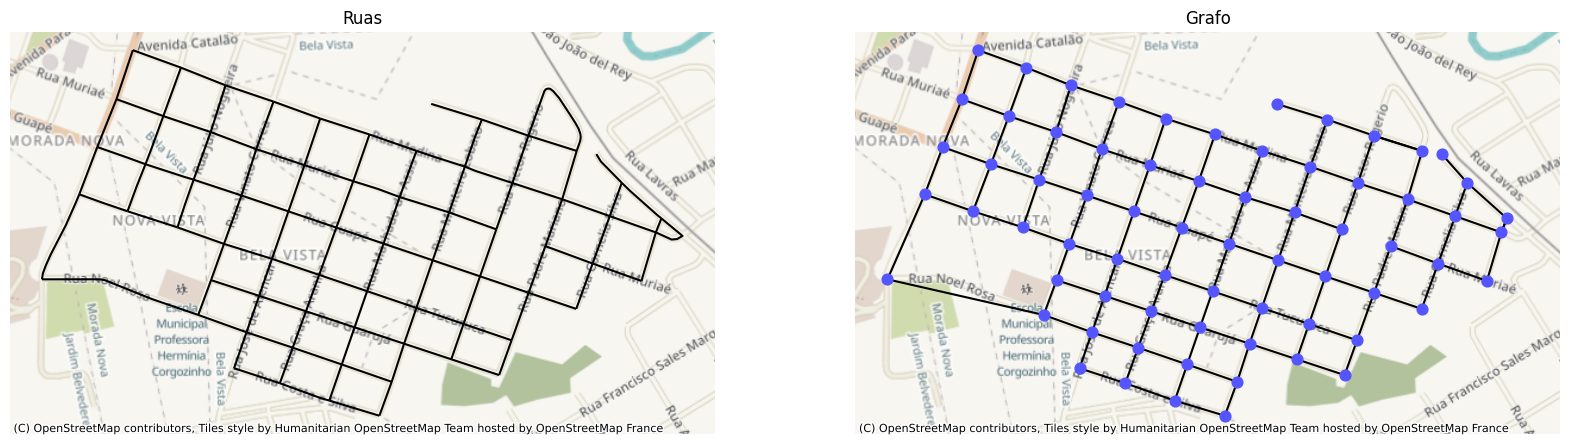

In [42]:
options = {
    "node_color": "#5555FF",
    "edge_color": "#000000",
    "width": 1.5,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}

# Plot
f, ax = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)
gdf.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Ruas", "Grafo")[i])
    facet.axis("off")
    add_basemap(facet, crs='EPSG:31983')
nx.draw(G, positions, ax=ax[1], node_size=60, **options)

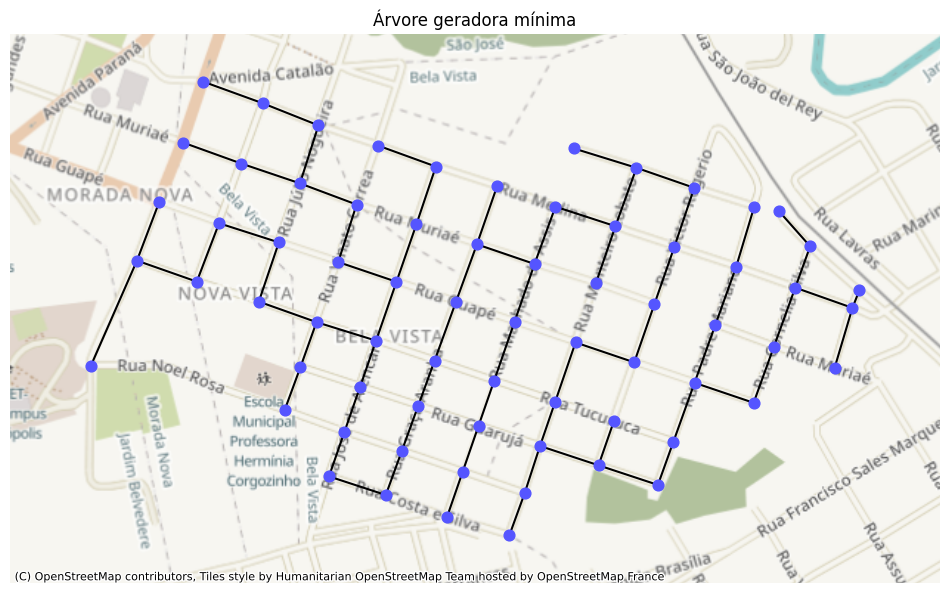

In [43]:
# Compute a minimum spanning tree T for G from root r
# using MST-PRIM (G, c, r)

T = nx.minimum_spanning_tree(G, 'length', 'prim')

options = {
    "node_color": "#5555FF",
    "edge_color": "#000000",
    "width": 1.5,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}

plt.figure(figsize=(12, 12))

nx.draw_networkx(T, positions, node_size=60, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.set_title("Árvore geradora mínima")
plt.axis("off")
add_basemap(ax, crs='EPSG:31983')
plt.show()

In [44]:
# Let H be a list of vertices, ordered according to when they are first
# visited in a preorder tree walk of T

H = list(nx.dfs_preorder_nodes(T, source=((510664.6519964975, 7769566.478152052))))

In [45]:
route = nx.DiGraph()
total_length = 0.0

for i in range(len(H) - 1):
    route.add_edge(H[i], H[i+1])
    if H[i+1] in list(G.neighbors(H[i])):
        total_length += list(G[H[i]][H[i+1]].values())[0]['length']
    else:
        total_length += nx.shortest_path_length(G, H[i], H[i+1], 'length')

print('Total length: {:.2f} km'.format(total_length/1000))

Total length: 9.75 km


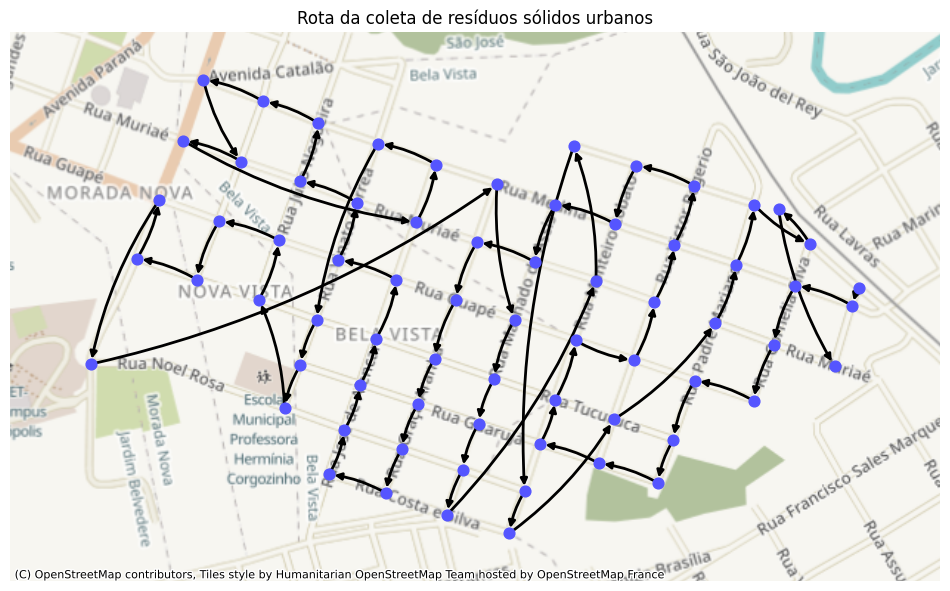

In [46]:
# Plot result
options = {
    "node_color": "#5555FF",
    "edge_color": "#000000",
    "width": 2,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
    "connectionstyle": "arc3,rad=0.1"
}

plt.figure(figsize=(12, 12))

nx.draw_networkx(route, positions, node_size=60, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.set_title("Rota da coleta de resíduos sólidos urbanos")
plt.axis("off")
add_basemap(ax, crs='EPSG:31983')
plt.show()